# Team 4 - Ujjwal Gupta , Merwin Roy

Find a simple one-humped dataset and model it by matching one of the pdfs we learned about today. Find the most likely parameters of your pdf using MOM. Use the model to do a prediction.

In [ ]:
import pandas as pd

Let's consider a weather data set of Seattle for Daily Weather Prediction with precipitation, temp_max, temp_min, wind as column

In [88]:
p = pd.read_csv("D:/data/seattle.csv")
df=p[['date','precipitation','temp_max','temp_min','wind']]
df.set_index('date',inplace=True)
df.head(100)

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...
2012-04-05,4.6,9.4,2.8,1.8
2012-04-06,0.3,11.1,3.3,2.6
2012-04-07,0.0,16.1,1.7,4.3


In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

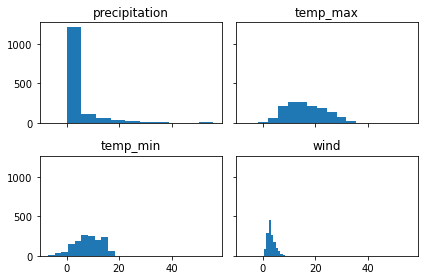

In [90]:
_ = df.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

Eye balling the Data shows Gamma distribution will be most sutiable for this data set

In [91]:
df.isna().any()

precipitation    False
temp_max         False
temp_min         False
wind             False
dtype: bool

There is no NULL values in the columns.

Calculating the mean, and variance

In [110]:
precip_mean = df.mean()
precip_mean

precipitation     3.029432
temp_max         16.439083
temp_min          8.234771
wind              3.241136
dtype: float64

In [111]:
precip_var =df.var()
precip_var

precipitation    44.624996
temp_max         54.018944
temp_min         25.230571
wind              2.067341
dtype: float64

We then use these moments to estimate  𝛼  and  𝛽  for each month:

In [94]:
alpha_mom = (precip_mean**2)/(precip_var)
beta_mom = (precip_var)/(precip_mean)

In [95]:
alpha_mom

precipitation    0.205657
temp_max         5.002753
temp_min         2.687670
wind             5.081389
dtype: float64

In [96]:
beta_mom

precipitation    14.730483
temp_max          3.286007
temp_min          3.063907
wind              0.637844
dtype: float64

Then, use the gamma.pdf function in scipy.stats.distributions to plot the distributions implied by the calculated alphas and betas.

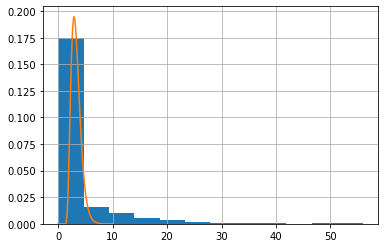

In [107]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats.distributions import gamma

df.precipitation.hist(density=True, bins=12)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 25), alpha_mom[1], beta_mom[1]))

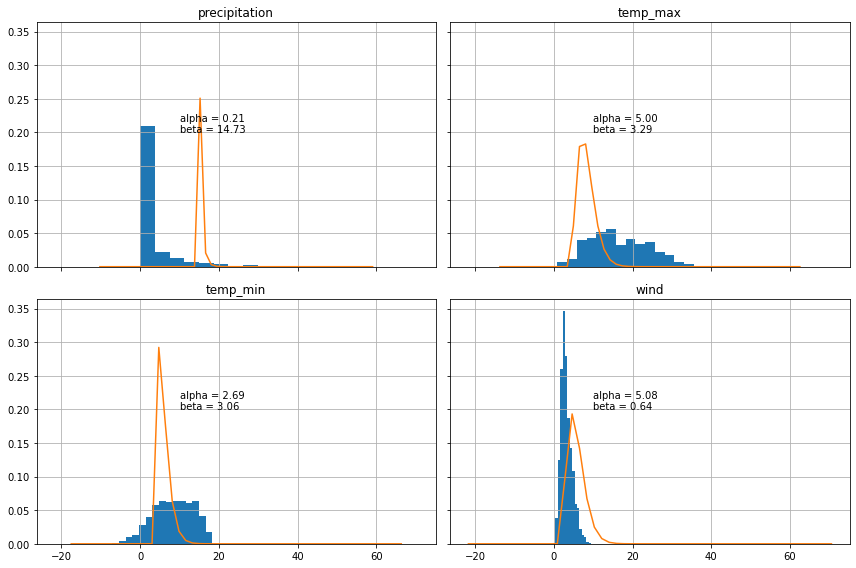

In [114]:
axs = df.hist(density=True, figsize=(12,8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():

    # Get month
    m = ax.get_title()

    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))

plt.tight_layout()